In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%precision 3
%matplotlib inline

In [2]:
weather = [
    'cloudy', 'cloudy', 'rainy', 'rainy', 'sunny', 'sunny'
]
beer = [6, 8, 2, 4, 10, 12]
weather_beer = pd.DataFrame({
    'beer': beer,
    'weather': weather
})
weather_beer

,beer,weather
0,6,cloudy
1,8,cloudy
2,2,rainy
3,4,rainy
4,10,sunny
5,12,sunny


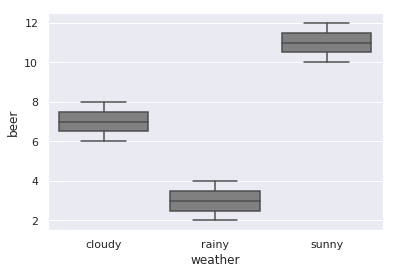

In [3]:
sns.boxplot(x='weather', y='beer', data=weather_beer, color='gray')

In [4]:
weather_beer.groupby('weather').mean()

,beer
weather,
cloudy,7
rainy,3
sunny,11


In [5]:
effect = [7, 7, 3, 3, 11, 11]
mu_effect = sp.mean(effect)
squares_model = sp.sum((effect - mu_effect)**2)
squares_model

64.0

In [6]:
resid = weather_beer.beer - effect
resid

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

In [7]:
squares_resid = sp.sum(resid**2)
squares_resid

6

In [8]:
df_model = 2
df_resid = 3

In [9]:
variance_model = squares_model / df_model
variance_model

32.0

In [10]:
variance_resid = squares_resid / df_resid
variance_resid

2.0

In [11]:
f_ratio = variance_model / variance_resid
f_ratio

16.0

In [12]:
1 - sp.stats.f.cdf(x=f_ratio, dfn=df_model, dfd=df_resid)

0.02509457330439091

In [13]:
anova_model = smf.ols('beer~weather', data=weather_beer).fit()
sm.stats.anova_lm(anova_model, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
weather,2.0,64.0,32.0,16.0,0.025095
Residual,3.0,6.0,2.0,NaN,NaN


In [14]:
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

In [15]:
fitted = anova_model.fittedvalues
fitted

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

In [16]:
anova_model.resid

0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64

In [17]:
beer = pd.read_csv('beer.csv')
lm_model = smf.ols(formula='beer~temperature', data=beer).fit()

In [18]:
df_lm_model = 1
df_lm_resid = 28

In [19]:
lm_effect = lm_model.fittedvalues
lm_resid = lm_model.resid
mu = sp.mean(lm_effect)
squares_lm_model = sp.sum((lm_effect - mu)**2)
variance_lm_model = squares_lm_model / df_lm_model
squares_lm_resid = sp.sum((lm_resid)**2)
variance_lm_resid = squares_lm_resid / df_lm_resid
f_value_lm = variance_lm_model / variance_lm_resid
f_value_lm

28.44698368850461

In [20]:
sm.stats.anova_lm(lm_model, typ=2)

,sum_sq,df,F,PR(>F)
temperature,1651.532489,1.0,28.446984,0.000011
Residual,1625.582178,28.0,NaN,NaN


In [21]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Thu, 03 Jan 2019   Prob (F-statistic):           1.11e-05
Time:                        12:10:41   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""